In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from lca import LCA
from sklearn.metrics import silhouette_score

## Prepare CB startup category groups data

In [ ]:
data = pd.read_csv('funded_firms_info.csv',encoding='latin-1')
data

In [ ]:
data = data[['org_uuid','category_groups_list']]
print(data.shape)

In [ ]:
data['category_groups_list'] = data['category_groups_list'].str.replace("\n","")
data['category_groups_list'] = data['category_groups_list'].str.replace('" "',',')
data['category_groups_list'] = data['category_groups_list'].str.replace("' '",",")
data['category_groups_list'] = data['category_groups_list'].str.replace("' \"",",")
data['category_groups_list'] = data['category_groups_list'].str.replace("\" '",",")
data['category_groups_list'] = data['category_groups_list'].str.replace("[","")
data['category_groups_list'] = data['category_groups_list'].str.replace("]","")
data['category_groups_list'] = data['category_groups_list'].str.replace("'","")
data['category_groups_list'] = data['category_groups_list'].str.replace('"','')
data['category_groups_list'] = data['category_groups_list'].str.split(',')
data

In [ ]:
data = data.explode('category_groups_list')
data['category_groups_list'] = data['category_groups_list'].str.strip()
data = data.set_index('org_uuid')
data = data[data['category_groups_list']!='']
data

In [ ]:
columns = list(pd.get_dummies(data['category_groups_list']).columns)
columns

In [ ]:
data = pd.get_dummies(data['category_groups_list']).groupby(level=0).max()
data

In [ ]:
data[data.sum(axis=1)==0] ## checking all organizations have at least one label

In [ ]:
data_np = np.array(data.astype(int))
data_np.shape

## Model selection: Minimise Integrated Completed Likelihood (ICL), reasonable BIC and silouette score

In [ ]:
ks = [51,52,53,54,55,56,57]
icls = []
sils = []
psts = []
for k in ks:
    lca = LCA(n_components=k, tol=10e-3, max_iter=300)
    lca.fit(data_np)
    print(k, lca.icl, lca.bic, lca.icl-lca.bic)
    icls.append(lca.icl)
    ## check silhouette score must be large enough (measures how well separated the clusters are)
    labels = lca.predict(data_np)
    sep = silhouette_score(data_np, labels)
    print(f"Average silhouette: {sep:.3f}")
    sils.append(sep)
    ## average posterior probabilities
    posteriors = lca.responsibility
    #pst_mean = posteriors.max(axis=1).mean()
    pst = 1 - np.mean(stats.entropy(posteriors.T)) / np.log(posteriors.shape[1])
    print(f"Mean max posterior: {posteriors.max(axis=1).mean():.3f}")
    print(f"Posterior certainty: {pst:.3f}")
    print(np.mean(stats.entropy(posteriors.T))) ## should equal (ICT-BIC)/2/N
    psts.append(pst)


51 664887.4172511689 631383.5794327847 33503.83781838417
Average silhouette: 0.162
Mean max posterior: 0.833
Posterior certainty: 0.884
0.45623179056957175
52 664879.4791751639 630862.4182868458 34017.06088831811
Average silhouette: 0.162
Mean max posterior: 0.830
Posterior certainty: 0.883
0.4632205028886489
53 665028.2045900489 630522.285116131 34505.91947391792
Average silhouette: 0.162
Mean max posterior: 0.828
Posterior certainty: 0.882
0.46987743663793324
54 665285.1567310238 630258.2463299729 35026.91040105093
Average silhouette: 0.160
Mean max posterior: 0.828
Posterior certainty: 0.880
0.4769719259582776
55 662942.5866626265 630512.873854846 32429.71280778048
Average silhouette: 0.163
Mean max posterior: 0.833
Posterior certainty: 0.890
0.4416051087047072
56 662980.6565101267 630553.1078483071 32427.548661819543
Average silhouette: 0.166
Mean max posterior: 0.840
Posterior certainty: 0.890
0.4415756388870425
57 662079.7023962036 629584.7174381457 32494.98495805799
Average silh

In [10]:
ks = [58,59]
icls = []
sils = []
psts = []
for k in ks:
    lca = LCA(n_components=k, tol=10e-3, max_iter=300)
    lca.fit(data_np)
    print(k, lca.icl, lca.bic, lca.icl-lca.bic)
    icls.append(lca.icl)
    ## check silhouette score must be large enough (measures how well separated the clusters are)
    labels = lca.predict(data_np)
    sep = silhouette_score(data_np, labels)
    print(f"Average silhouette: {sep:.3f}")
    sils.append(sep)
    ## average posterior probabilities
    posteriors = lca.responsibility
    #pst_mean = posteriors.max(axis=1).mean()
    pst = 1 - np.mean(stats.entropy(posteriors.T)) / np.log(posteriors.shape[1])
    print(f"Mean max posterior: {posteriors.max(axis=1).mean():.3f}")
    print(f"Posterior certainty: {pst:.3f}")
    print(np.mean(stats.entropy(posteriors.T))) ## should equal (ICT-BIC)/2/N
    psts.append(pst)

58 663319.0982201794 629419.3242767901 33899.7739433893
Average silhouette: 0.162
Mean max posterior: 0.828
Posterior certainty: 0.886
0.4616233713117329
59 665597.6343876432 628864.3897286183 36733.24465902487
Average silhouette: 0.161
Mean max posterior: 0.814
Posterior certainty: 0.877
0.5002075904743009


In [28]:
ks = [60,61,62,63,64,65,66,67,68]
icls = []
sils = []
psts = []
for k in ks:
    lca = LCA(n_components=k, tol=10e-3, max_iter=300)
    lca.fit(data_np)
    print(k, lca.icl, lca.bic, lca.icl-lca.bic)
    icls.append(lca.icl)
    ## check silhouette score must be large enough (measures how well separated the clusters are)
    labels = lca.predict(data_np)
    sep = silhouette_score(data_np, labels)
    print(f"Average silhouette: {sep:.3f}")
    sils.append(sep)
    ## average posterior probabilities
    posteriors = lca.responsibility
    #pst_mean = posteriors.max(axis=1).mean()
    pst = 1 - np.mean(stats.entropy(posteriors.T)) / np.log(posteriors.shape[1])
    print(f"Mean max posterior: {posteriors.max(axis=1).mean():.3f}")
    print(f"Posterior certainty: {pst:.3f}")
    print(np.mean(stats.entropy(posteriors.T))) ## should equal (ICT-BIC)/2/N
    psts.append(pst)

60 661232.4009761697 628038.8802546556 33193.52072151413
Average silhouette: 0.168
Mean max posterior: 0.834
Posterior certainty: 0.890
0.4520061096161925
61 662708.8025985338 628172.3713892945 34536.431209239294
Average silhouette: 0.166
Mean max posterior: 0.828
Posterior certainty: 0.886
0.4702929239279964
62 662643.1401502467 627801.2378758393 34841.90227440733
Average silhouette: 0.166
Mean max posterior: 0.825
Posterior certainty: 0.885
0.4744526148374802
63 662144.6414552856 627135.596363448 35009.045091837645
Average silhouette: 0.166
Mean max posterior: 0.824
Posterior certainty: 0.885
0.47672864858722475
64 661672.6611778557 626935.891715052 34736.76946280373
Average silhouette: 0.167
Mean max posterior: 0.825
Posterior certainty: 0.886
0.47302098985528485
65 661015.2064207857 626973.039905313 34042.166515472694
Average silhouette: 0.166
Mean max posterior: 0.828
Posterior certainty: 0.889
0.4635623734907178
66 661238.1028592811 626834.2887442356 34403.814115045476
Average si

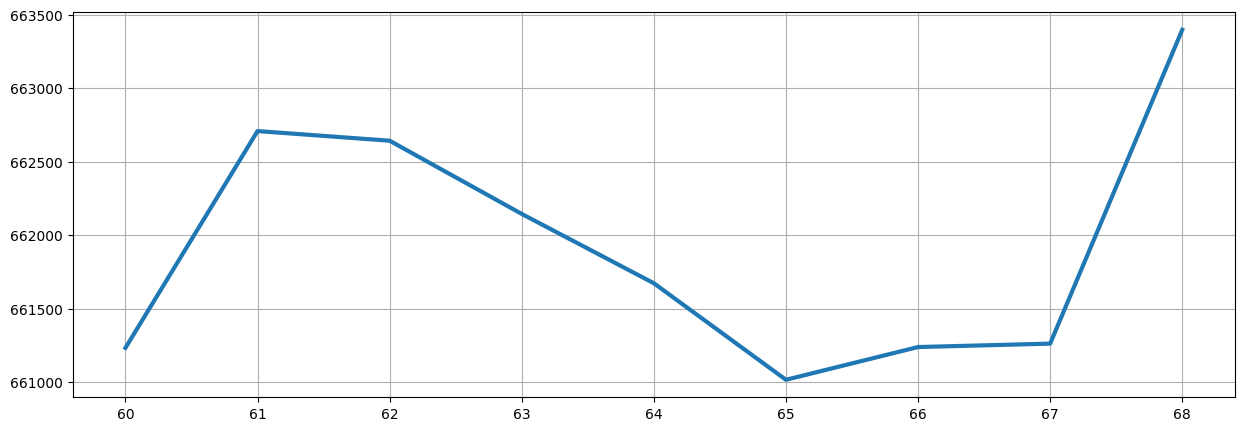

In [29]:
ks = [60,61,62,63,64,65,66,67,68]
_,ax = plt.subplots(figsize=(15,5))
ax.plot(ks, icls, linewidth=3)
ax.grid(True)

## Train LCA model with the optimal number of classes

In [30]:
lca = LCA(n_components=65, tol=10e-3, max_iter=300)

In [31]:
%%time
lca.fit(data_np)

CPU times: user 51min 11s, sys: 9min 58s, total: 1h 1min 10s
Wall time: 1h 1min 18s


In [ ]:
display(lca.__dict__)

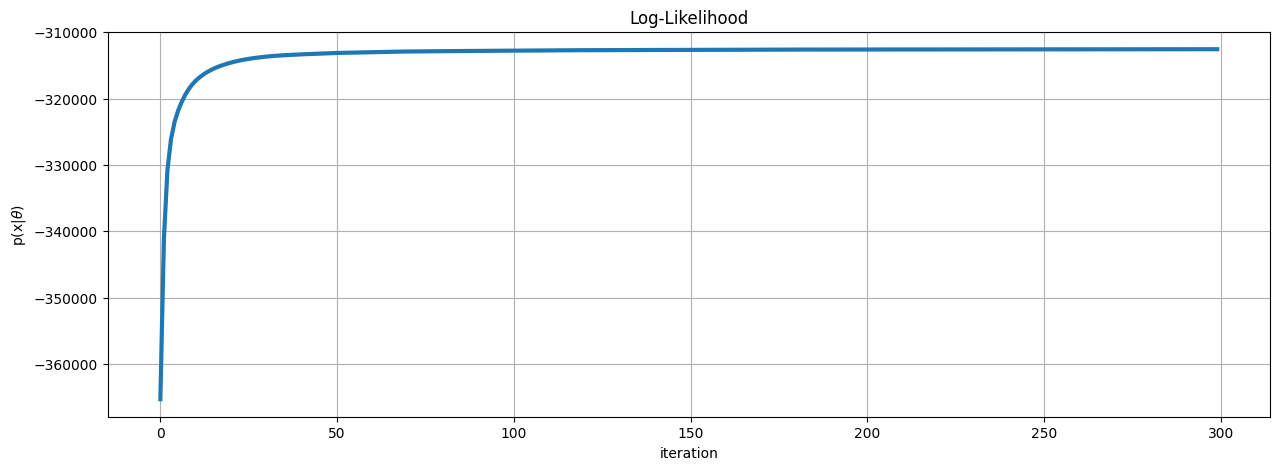

In [33]:
## CONVERGENCE GRAPH: NUMBER OF ITERATIONS AND LIKELIHOOD
_,ax = plt.subplots(figsize=(15,5))
ax.plot(lca.ll_[1:], linewidth=3)
ax.set_title("Log-Likelihood")
ax.set_xlabel("iteration")
ax.set_ylabel(r"p(x|$\theta$)")
ax.grid(True)

In [34]:
## PLOT THE CATEGORY GROUP DISTRIBUTIONS OF THE LATENT CLASSES
_,axs = plt.subplots(nrows=lca.theta.shape[0], figsize=(15,lca.theta.shape[0]*10))
axs = axs.ravel()
for i,ax in enumerate(axs):
    ax.bar(range(len(columns)),lca.theta[i,:])
    ax.set_xticks(range(len(columns)))
    ax.set_xticklabels(columns, rotation="vertical")

In [35]:
labels = lca.predict(data_np)

In [ ]:
{x:list(labels).count(x) for x in set(labels)}

In [37]:
outputs = lca.__dict__
outputs['labels'] = labels.tolist()
outputs['weight'] = outputs['weight'].tolist()
outputs['theta'] = outputs['theta'].tolist()
outputs['responsibility'] = outputs['responsibility'].tolist()
outputs['columns'] = columns
outputs['org_uuids'] = data.index.tolist()